<a href="https://colab.research.google.com/github/thetajwar2003/Neural-Networks/blob/master/Iris_Setosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/bxs-machine-learning-club/Iris-Setosa/master/Iris.csv')

In [0]:
dataset = dataset.drop(["Id"], axis = 1)

In [0]:
dataset = dataset.replace ('Iris-setosa', 1)
dataset = dataset.replace ('Iris-virginica', 3)
dataset = dataset.replace ('Iris-versicolor', 2)

In [0]:
feature = dataset.drop(["Species"], axis = 1)
label = dataset["Species"]
feature = scale(feature)

In [0]:
label

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [0]:
dataset.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        3
146            6.3           2.5            5.0           1.9        3
147            6.5           3.0            5.2           2.0        3
148            6.2           3.4            5.4           2.3        3
149            5.9           3.0            5.1           1.8        3

[150 rows x 5 columns]>

In [0]:
x_train, x_test, y_train, y_test = train_test_split(feature, label)

In [0]:
model = Sequential([
        Dense(32, input_dim = 4),
        Activation('relu'),
        Dense(64),
        Activation('relu'),
        Dense(128),
        Activation('relu'),
        Dense(1),
        Activation('linear'),
])

In [0]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error', 'accuracy'])

In [0]:
h = model.fit(x_train, y_train, epochs = 500, validation_split=0.3)

Train on 78 samples, validate on 34 samples
Epoch 1/500
78/78 [==============================] - 0s 4ms/step - loss: 4.0684 - mean_squared_error: 4.0684 - mean_absolute_error: 1.8203 - acc: 0.0000e+00 - val_loss: 3.4491 - val_mean_squared_error: 3.4491 - val_mean_absolute_error: 1.6302 - val_acc: 0.0294
Epoch 2/500
78/78 [==============================] - 0s 159us/step - loss: 3.4072 - mean_squared_error: 3.4072 - mean_absolute_error: 1.6124 - acc: 0.2308 - val_loss: 2.8566 - val_mean_squared_error: 2.8566 - val_mean_absolute_error: 1.4174 - val_acc: 0.3529
Epoch 3/500
78/78 [==============================] - 0s 153us/step - loss: 2.7821 - mean_squared_error: 2.7821 - mean_absolute_error: 1.3974 - acc: 0.3333 - val_loss: 2.2986 - val_mean_squared_error: 2.2986 - val_mean_absolute_error: 1.2005 - val_acc: 0.3529
Epoch 4/500
78/78 [==============================] - 0s 151us/step - loss: 2.2509 - mean_squared_error: 2.2509 - mean_absolute_error: 1.2327 - acc: 0.3333 - val_loss: 1.7900 - v

In [0]:
print(h.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_squared_error', 'mean_absolute_error', 'acc'])


In [0]:
acc, loss, mse, mae = model.evaluate(x_test, y_test)

38/38 [==============================] - 0s 152us/step


In [0]:
print('The average root mean square error (RMSE) of the model is {:5.3f}'.format(np.sqrt(mse)))

The average root mean square error (RMSE) of the model is 0.413


Here will be four seperate graphs: comparing accuracy, loss, mean square error, and mean absolute error-----

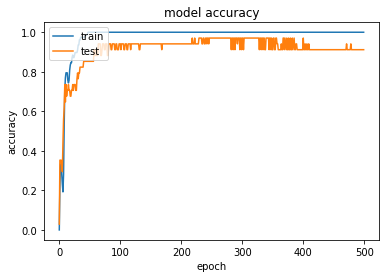

In [0]:
##ACCURACY GRAPH
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

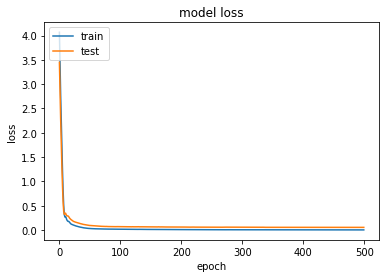

In [0]:
##LOSS GRAPH
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

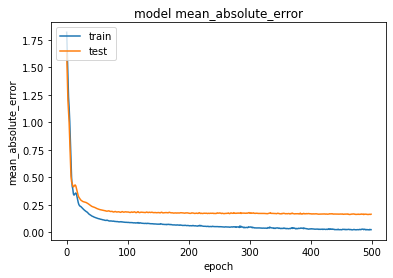

In [0]:
##MEAN ABSOLUTE ERROR
plt.plot(h.history['mean_absolute_error'])
plt.plot(h.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

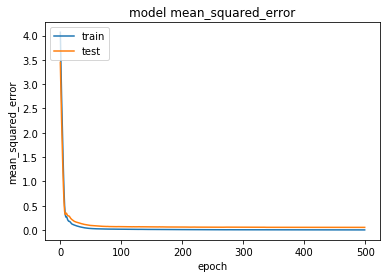

In [0]:
##MEAN SQUARED ERROR
plt.plot(h.history['mean_squared_error'])
plt.plot(h.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()